In [1]:
# Dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colormaps as cmaps
from matplotlib.colors import ListedColormap as lcmap
from matplotlib.colors import Normalize as norm
from matplotlib.colors import LogNorm as logn
import matplotlib.animation as animation

In [20]:
# year list of data set
dt = [str(x) for x in range(2013,2025)]
# set custom colomap
afmhot = cmaps['afmhot']
afmhot2 = lcmap(afmhot(np.linspace(0.1, 0.7, 256)))

In [22]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
for yr in dt:
    if yr == dt[0]:
        df1 = pd.read_csv(f'../outputs/nasa-firms/boxplot/frp/{yr}.csv')
        df2 = pd.read_csv(f'../outputs/nasa-firms/boxplot/cnt/{yr}.csv')
    else:
        df1 = pd.concat([df1,pd.read_csv(f'../outputs/nasa-firms/boxplot/frp/{yr}.csv')], axis=1)
        df2 = pd.concat([df2,pd.read_csv(f'../outputs/nasa-firms/boxplot/cnt/{yr}.csv')], axis=1)

In [23]:
df1

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07
0,13.72,17.99,1.73,13.54,24.79,0.53,3.63,0.31,0.77,12.39,...,8.27,2.49,1.98,3.15,2.00,2.20,9.49,16.40,6.36,0.46
1,2.67,15.92,15.76,31.01,0.96,52.46,1.13,9.88,13.82,8.35,...,12.32,24.72,1.90,9.81,5.77,4.15,48.97,16.15,0.69,1.37
2,0.67,15.88,5.17,4.91,1.82,22.80,4.85,43.52,84.56,5.49,...,16.05,54.35,2.21,18.40,15.43,8.68,4.83,10.53,37.46,5.32
3,2.77,0.80,2.13,0.32,2.49,52.57,6.69,1030.18,3.26,42.52,...,8.97,316.83,11.95,14.47,3.45,36.75,9.21,1.79,242.52,195.64
4,1.26,52.83,7.41,3.03,22.29,6.65,0.67,0.66,21.98,2.47,...,5.88,48.08,23.89,1.20,2.89,6.07,2.42,0.80,79.40,5681.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df3 = df1*df2
df4 = df1/df2

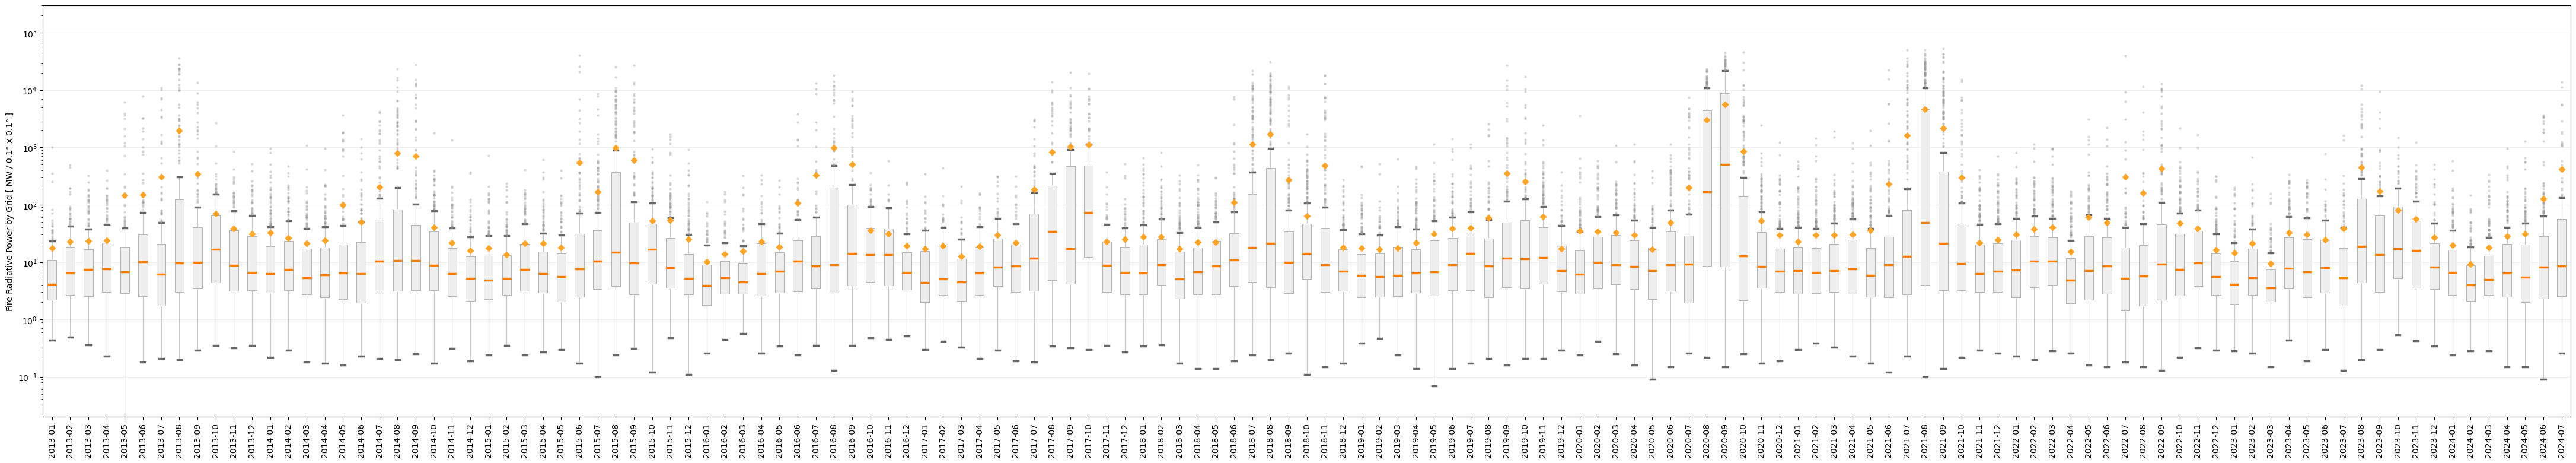

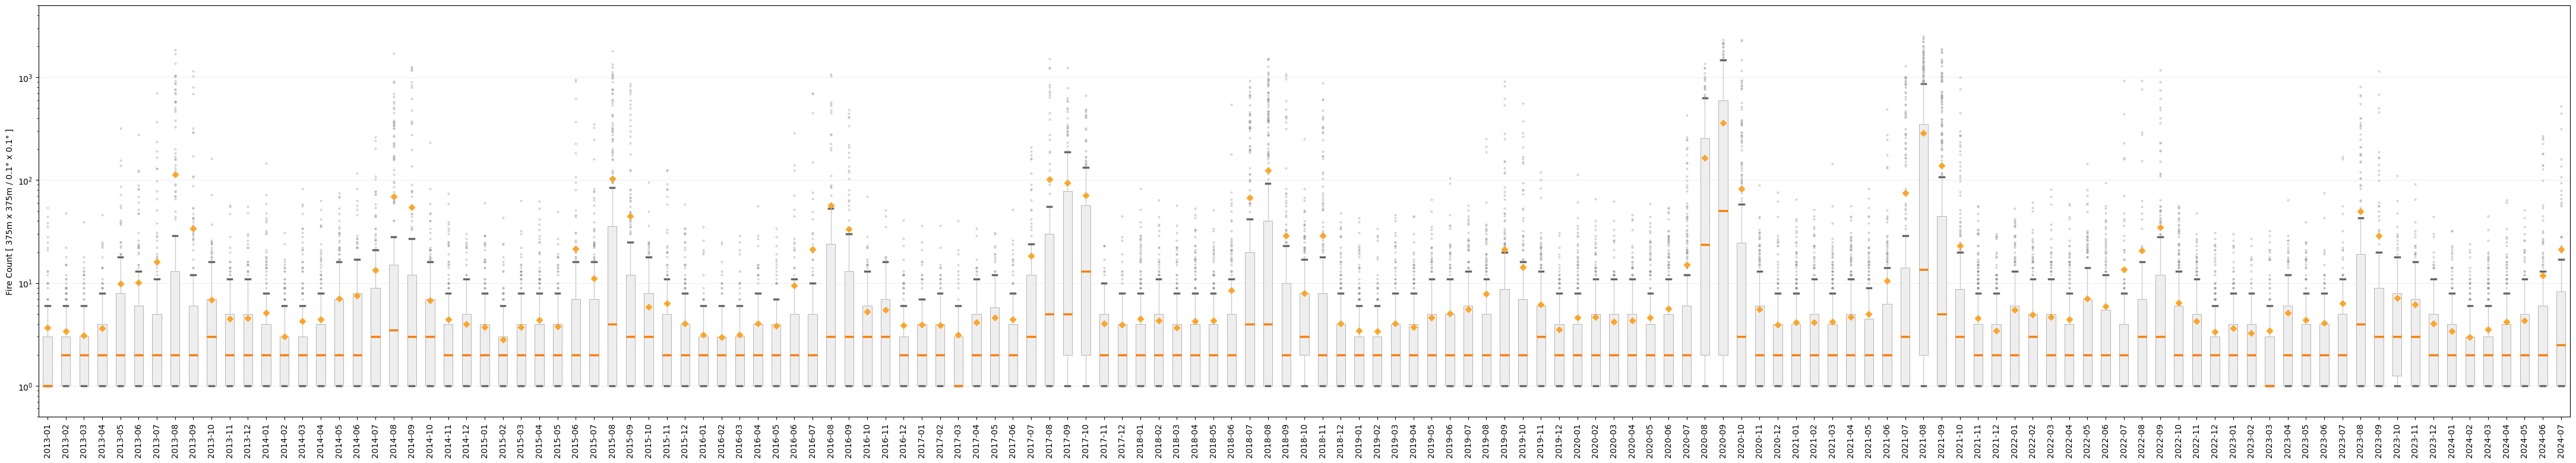

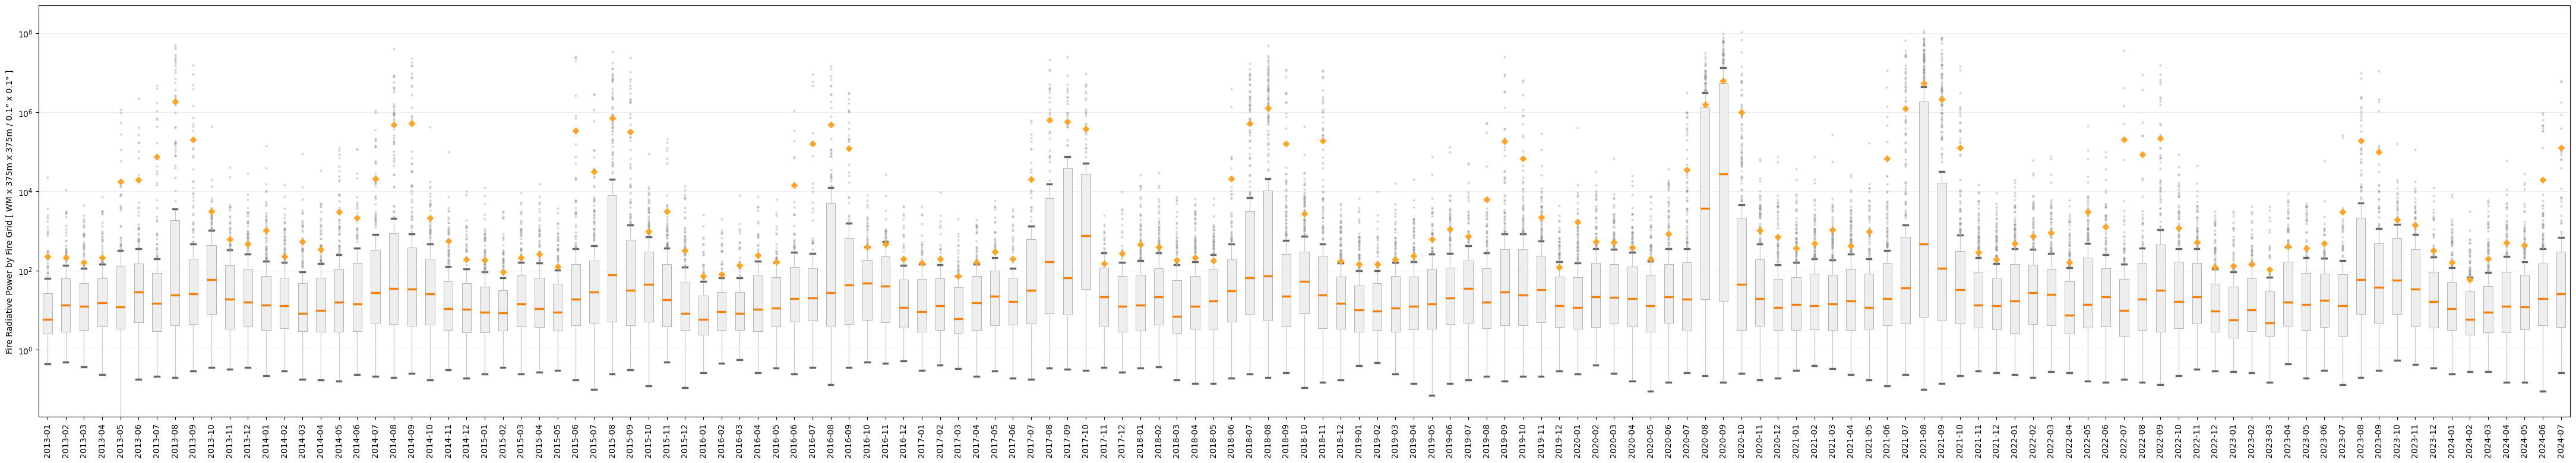

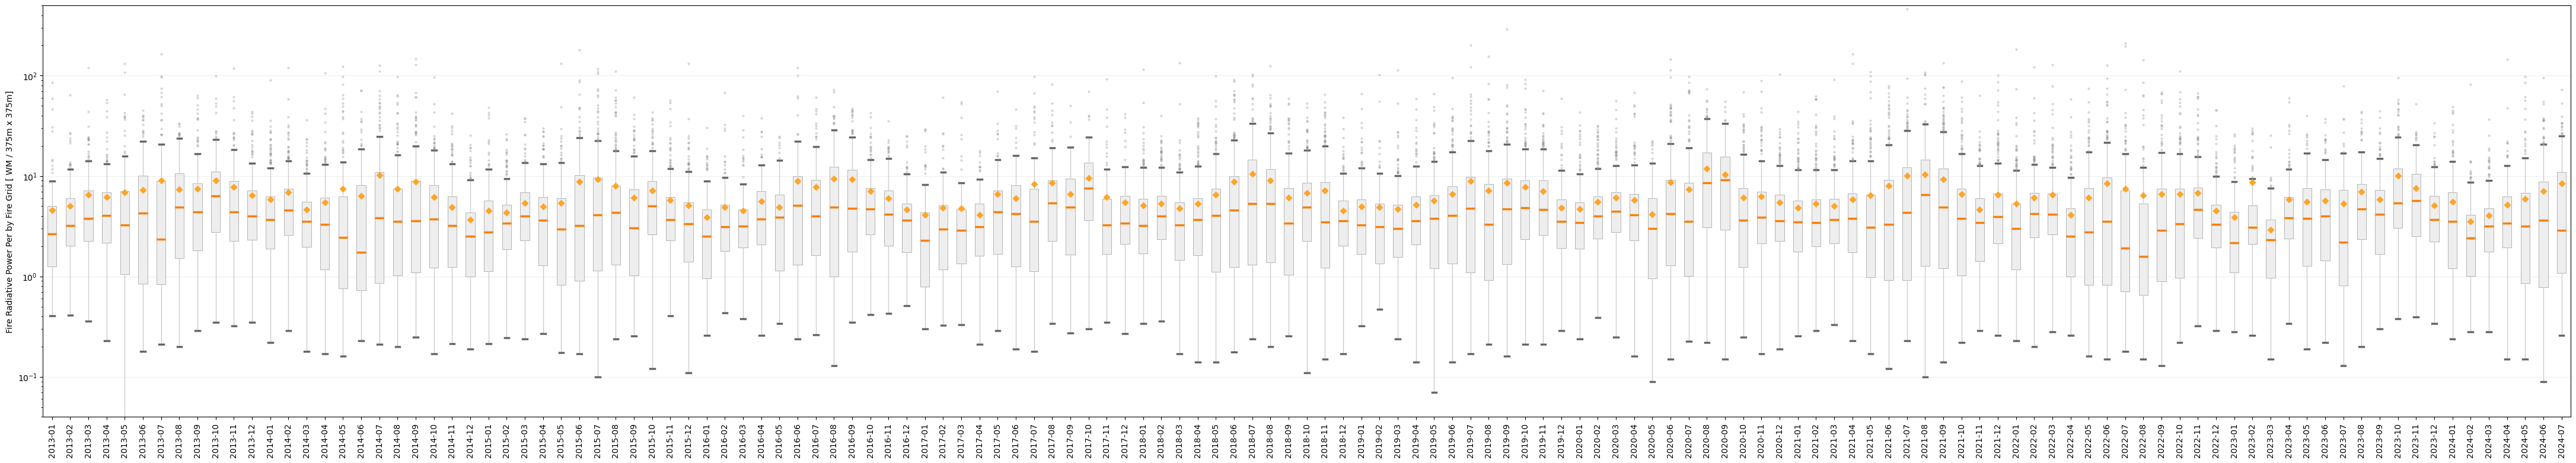

In [50]:
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#eee")
flierprops = dict(marker='o', markerfacecolor='#999', markersize=3, markeredgecolor='none', alpha=0.4)
medianprops = dict(linestyle='-', linewidth=2.5, color='#fc7d00')
meanprops = dict(marker='D', markeredgecolor='none',markerfacecolor='#ffa425')
capprops = dict(color="#666", linewidth = 2.5)

df1.boxplot(ylabel='Fire Radiative Power by Grid [ MW / 0.1° x 0.1° ]', 
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.xticks(rotation='vertical')
plt.ylim([0.02,300000])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/frp_boxplot.png')
plt.show()

df2.boxplot(ylabel='Fire Count [ 375m x 375m / 0.1° x 0.1° ]', 
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.xticks(rotation='vertical')
plt.ylim([0.5,5000])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/cnt_boxplot.png')
plt.show()

df3.boxplot(ylabel='Fire Radiative Power by Fire Grid [ WM x 375m x 375m / 0.1° x 0.1° ]',
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.xticks(rotation='vertical')
plt.ylim([0.02,500000000])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/exp_boxplot.png')
plt.show()

df4.boxplot(ylabel='Fire Radiative Power Per by Fire Grid [ WM / 375m x 375m]', 
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.xticks(rotation='vertical')
plt.ylim([0.04,500])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/com_boxplot.png')
plt.show()